# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [14]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [15]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
print (y.shape)

(97, 2)
(97,)


Text(0, 0.5, 'Bénéfice x1000')

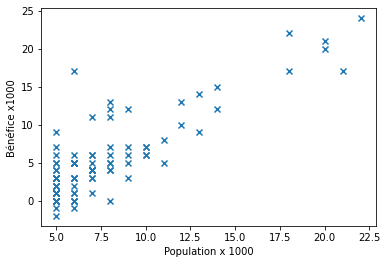

In [16]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [17]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    n = len(X)
    h = X.dot(theta)
    mse = np.sum(((y-h) ** 2),axis=0) /n
    return mse
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [18]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(X)
    thetas=[]
    costs=[]
    thetas.append(theta)
    for iter in range(iterations):
        # Enregistrement de la fonction de coût
        cost = computeCost(X, y, theta)
        costs.append(cost)
        # Calcul de la prédiction h(x) = X * theta
        h = X.dot(theta)
        # Calcul de l'erreur
        error =y-h
        delth=(-2/m)*( X.T.dot(error))
        # Mise à jour des paramètres
        theta = theta - alpha  * delth 
        thetas.append(theta)
        
    return np.expand_dims(np.array(costs),axis=1),np.array(thetas)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [19]:
theta = np.zeros(2)
print(theta.shape)

(2,)


Calculer le cout initial

In [20]:
initialCost=computeCost(X, y, theta)
print(initialCost.shape)

()


Appel des la fonction de calcul du gradient

In [21]:
# paramètres
iterations = 300
alpha = 0.01
# Appel
costs,thetas = gradientDescent(X, y, theta, alpha, iterations)
print(thetas.shape)

(301, 2)


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

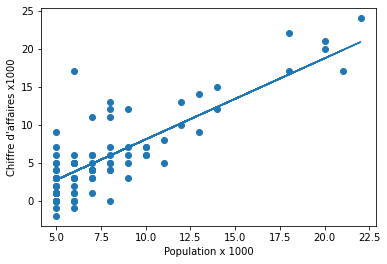

In [22]:
y_pred=np.matmul(X,thetas[-1])
plt.scatter(X[:,1],y)
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [23]:
def tangent_fun(X,y,theta,theta_star):
    error=y-X.dot(theta)
    dalta=(-2/len(X))*( X.T.dot(error))
    mse=computeCost(X,y,theta_star)
    result=dalta[0]*(theta[0]-theta_star[0])+dalta[1]*(theta[1]-theta_star[1])+mse
    return result

[-2.60199082  1.06700652]


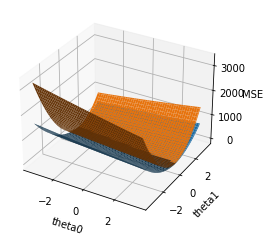

In [24]:
theta_star=thetas[-1]
print(theta_star)
x_thetas0=y_thetas1=np.arange(-3.5,3.5,0.05)
thetas0,thetas1= np.meshgrid(x_thetas0, y_thetas1)
z_mse=np.array([computeCost(X, y, np.array([theta0,theta1]) )for theta0,theta1 in zip(np.ravel(thetas0),np.ravel(thetas1))])
z_mse =z_mse.reshape(thetas0.shape)
tangent=np.array([tangent_fun(X, y, np.array([theta0,theta1]),theta_star) for theta0,theta1 in zip(np.ravel(thetas0),np.ravel(thetas1))])
tangent =tangent.reshape(thetas0.shape)
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(thetas0, thetas1,z_mse)
ax.plot_surface(thetas0, thetas1,tangent)
ax.scatter(thetas[-1,0],thetas[-1,1],computeCost(X, y,thetas[-1]),marker='D')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('MSE')
plt.show()

Prédire des valeurs de y

In [25]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

0.0

In [26]:
predict2 = np.matmul([1, 7],theta)
predict2

0.0

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [140]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [141]:
# d'abord créer X et y
x=np.concatenate([np.ones((dataMulti.shape[0],1)),dataMulti[:,0:2]],axis=1)
y=dataMulti[:,1]

In [142]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

In [143]:
from sklearn.preprocessing import StandardScaler

Normalisation des données en moyenne = 0

In [144]:
scaler = StandardScaler()
scaler.fit(x)
x_norml=scaler.transform(x)

Appliquer la descente du gradient à plusieurs variables

C:\Users\Client\AppData\Local\Temp\ipykernel_9064\4101000071.py:8: RuntimeWarning: overflow encountered in square
  mse = np.sum(((y-h) ** 2),axis=0) /n
C:\Users\Client\AppData\Local\Temp\ipykernel_9064\3431143497.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha  * delth


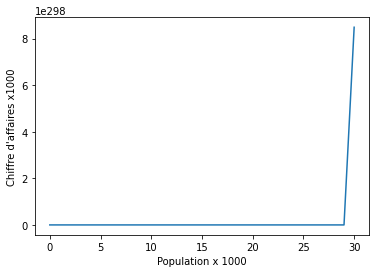

In [145]:
iterations =1500
alpha=0.01
theta=np.zeros(3)
costs,thetas = gradientDescent(x, y, theta, alpha, iterations)
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(np.arange(iterations),costs[:,0])

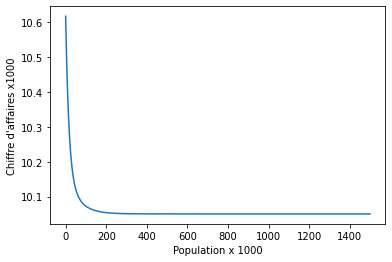

In [146]:
iterations =1500
alpha=0.01
costs,thetas = gradientDescent(x_norml, y, theta, alpha, iterations)
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(np.arange(iterations),costs[:,0])

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [147]:
from time import time
start = time()
costs,thetas = gradientDescent(x, y, theta, alpha, iterations)
end = time()
print(f"Temps de calcul sans normalisation : {end - start:.4f} secondes")

C:\Users\Client\AppData\Local\Temp\ipykernel_9064\4101000071.py:8: RuntimeWarning: overflow encountered in square
  mse = np.sum(((y-h) ** 2),axis=0) /n
C:\Users\Client\AppData\Local\Temp\ipykernel_9064\3431143497.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha  * delth


Temps de calcul sans normalisation : 0.2998 secondes


In [148]:
start = time()
costs,thetas = gradientDescent(x_norml, y, theta, alpha, iterations)
end = time()
print(f"Temps de calcul avec normalisation : {end - start:.4f} secondes")

Temps de calcul avec normalisation : 0.2643 secondes


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [149]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)

# Séparer les variables explicatives et la variable cible
X = dataMulti[:,0:2]
y = dataMulti[:,2]

# Initialiser les modèles
costs,thetas = gradientDescent(x_norml, y, theta, alpha, iterations)
sklearn_model = LinearRegression()

# Entraîner les modèles

sklearn_model.fit(x, y)



# Afficher les résultats
print("Manuel : Coefficients :", thetas[-1])


print("scikitlearn : Coefficients :", sklearn_model.coef_)




Manuel : Coefficients : [     0.         109447.66435301  -6578.17562431]
scikitlearn : Coefficients : [    0.           139.21063465 -8737.91542019]


In [150]:
# Mesure le temps d'exécution de la fonction gradientDescentMulti
from sklearn.linear_model import LinearRegression
start = time()
costs,thetas = gradientDescent(x_norml, y, theta, alpha, iterations)
end = time()
print(f"Temps d'exécution gradientDescent : {end - start:.4f} secondes")

# Mesure le temps d'exécution de la fonction fit de scikit-learn
start = time()
model = LinearRegression()
model.fit(x_norml, y)
end = time()
print(f"Temps d'exécution scikitlearn : {end - start:.4f} secondes")


Temps d'exécution gradientDescent : 0.2349 secondes
Temps d'exécution scikitlearn : 0.0060 secondes


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [237]:
# bonne chance